In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Correlation between hours and scores

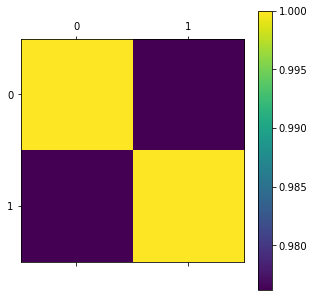

In [35]:
#to find if there is any relation between the number of hours and Scores obtained
f=plt.figure(figsize=(5,5))
plt.matshow(df.corr(),fignum=f.number)
plt.colorbar() #we see there is a strong positive correlation between hours and scores

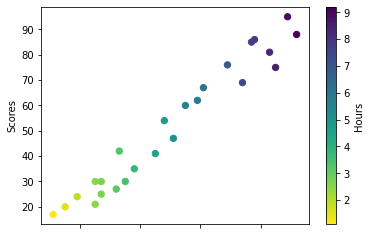

In [54]:

df.plot.scatter('Hours','Scores',c='Hours',s=40,colormap='viridis_r')


# Preparing a prediction model using linear regression

In [92]:
model=LinearRegression()
x=df.Hours.values.reshape(-1,1)
y=df.Scores.values
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)
equation=model.fit(X_train,y_train)#training the model by fitting values
prediction=model.predict(X_test) #obtaining predictions from trained model
prediction

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

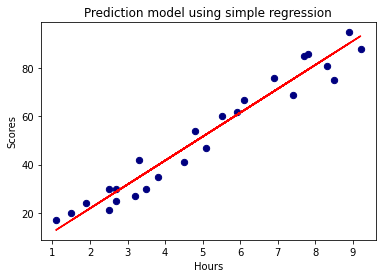

In [72]:
df.plot.scatter('Hours','Scores',s=40,color="navy")
plt.plot(x,Y,color="red")
plt.gca().set_title("Prediction model using simple regression")
Y=(model.coef_)*x + model.intercept_


In [62]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
df2

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Making prediction:

In [70]:
hours=np.array(9.25).reshape(-1,1)
a=model.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(a[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [90]:
from sklearn import metrics  
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('R-squared score (testing): {:.3f}'
     .format(model.score(X_test, y_test)))

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test,prediction)) 

R-squared score (training): 0.957
R-squared score (testing): 0.875
Mean Absolute Error: 5.767358910941684
